<a href="https://colab.research.google.com/github/rafaeldjsm/Data_Science/blob/master/nltk_treinando.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLTK - Natural Language Toolkit

In [54]:
import matplotlib.pyplot as plt
import re
import nltk
from nltk import bigrams
from nltk.corpus import PlaintextCorpusReader
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.text import Text
from nltk import collocations
from nltk.tokenize import word_tokenize
nltk.download('punkt')
import nltk.data
from nltk.corpus import machado
nltk.download('machado')

machado.fileids()
stopwordsPT = stopwords.words('portuguese')
print(machado.readme())

# corpus_root = '/content'
# machado = PlaintextCorpusReader(corpus_root, '.*') # Criação do curpus

Machado de Assis -- Obra Completa

http://machado.mec.gov.br/

Public Domain

Contents:

Romance

romance/marm01.txt: Ressurreição (1872)
romance/marm02.txt: A Mão e a Luva (1874)
romance/marm03.txt: Helena (1876)
romance/marm04.txt: Iaiá Garcia (1878)
romance/marm05.txt: Memórias Póstumas de Brás Cubas (1881)
romance/marm06.txt: Casa Velha (1885)
romance/marm07.txt: Quincas Borba (1891)
romance/marm08.txt: Dom Casmurro (1899)
romance/marm09.txt: Esaú e Jacó (1904)
romance/marm10.txt: Memorial de Aires (1908)

Poesia

poesia/maps01.txt: Crisálidas (1864)
poesia/maps02.txt: Falenas (1870)
poesia/maps03.txt: Americanas (1875)
poesia/maps04.txt: Gazeta de Holanda (1886-88)
poesia/maps05.txt: Ocidentais (1901)
poesia/maps06.txt: O Almada (1908)
poesia/maps07.txt: Dispersas (1854-1939)

Contos

contos/macn001.txt: Contos Fluminenses (1870); Miss Dollar; Luís Soares; A mulher de preto; O segredo de Augusta; Confissões de uma viúva moça; Linha reta e linha curva; Frei Sim
contos/macn002.txt: 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package machado to /root/nltk_data...
[nltk_data]   Package machado is already up-to-date!


Corpus é uma palavra do latim que usamos em PLN para chamar uma coleção de registros em linguagem natural (que podem ser tanto textos como áudios) que utilizamos para realizar nossa análise. Nos exemplos anteriores, temos utilizado um corpus que consiste nos textos de quatro peças de Shakespeare. 

In [2]:
# O método raw() retorna uma string com todo o conteúdo do livro. 

dom = machado.raw("romance/marm08.txt")
# bras = machado.raw("memriaspstumasdebrscubas.txt")
# borba = machado.raw("quincasborba.txt")

In [3]:
txt = "The rain in Spain"
x = re.search(r"^The.*in$", txt) 

In [4]:
x

<re.Match object; span=(0, 17), match='The rain in Spain'>

In [5]:
y = re.findall(r"^The.*in$", txt)
y

['The rain in Spain']

In [6]:
re.split(r'[ai]+', txt)

['The r', 'n ', 'n Sp', 'n']

[] 	A set of characters <br>

In [7]:
#  + 	One or more occurrences

txt = "hello planet \n What a hell"

#Search for a sequence that starts with "he", followed by 1 or more  (any) characters, and an "o":

x = re.findall(r"h.+l", txt)

print(x)

['hello pl', 'hat a hell']


In [8]:
re.split(r'[ai]+', txt)

['hello pl', 'net \n Wh', 't ', ' hell']

In [9]:
with open('domcasmurro.txt', 'w') as f:
    f.write(dom)

In [10]:
nome = "domcasmurro.txt"    # poderia ser um input("Digite o nome do arquivo: ")

with open(nome, 'r', encoding='utf-8-sig') as arq_entrada:
    # CORPO DO WITH
    conteudo = arq_entrada.read()

# The with block ensures that the file will be closed when control leaves the block

# continue o programa usando conteudo
print(conteudo[:200])

Romance, Dom Casmurro, 1899

Dom Casmurro

Texto de referência:

Obras Completas de Machado de Assis,
vol. I,

Nova Aguilar, Rio de
Janeiro, 1994.

 Publicado originalmente
pela Editora Garnier, Rio d


In [11]:
conteudo[12:24]

' Casmurro, 1'

In [12]:
len(conteudo)

373504

In [13]:
re.search("U.. noit.", conteudo)

<re.Match object; span=(248, 257), match='Uma noite'>

In [14]:
re.findall(r"U.. noite", conteudo)

['Uma noite', 'Uma noite', 'Uma noite']

In [15]:
re.findall("[0-9]{3}.*", conteudo)

['1899',
 '1994.',
 '1899.',
 '1857.',
 '1857, D. Maria da Glória Fernandes Santiago contava quarenta e dois anos de',
 '1882, indo ver certo negócio em repartição de marinha, ali dei',
 '1859 ou',
 '1860...',
 '1859 ou 1860 é muito tarde.',
 '4004. Disse-me que esta',
 '1858) não',
 '1851) que residia em',
 '1824 e',
 '1825, e, para que tudo fosse antigo, a si mesma se queria fazer velha; mas já',
 '484, e assim por diante. Mas onde a perfeição é maior é no emprego do zero.',
 '500. Assim, o',
 '070$000 mensais.',
 '000 a 180$000. Pois tudo isto em que eu gastaria três ou quatro minutos, \x97 e',
 '070$000.',
 '070$000, além dos escravos...',
 '1865, uma tarde de março, por sinal que chovia.',
 '1857... A felicidade tem boa',
 '1871. Nunca me esqueceu o mês nem o ano.',
 '1872.']

In [16]:
re.findall("Bentinho...*", conteudo)

['Bentinho no seminário? É mais que tempo, e já agora pode',
 'Bentinho ande',
 'Bentinho quase não sai de lá. A pequena é uma desmiolada; o pai',
 'Bentinho mal tem quinze anos. Capitu fez quatorze à semana passada; são dois',
 'Bentinho há de satisfazer os',
 'Bentinho ri logo, não agüenta.',
 "Bentinho no seminário'.",
 'Bentinho, deixemos o',
 'Bentinho; tu podes',
 'Bentinho, que é',
 'Bentinho, disse',
 'Bentinho. E depois... Vocação? Mas a vocação vem com o costume,',
 'Bentinho; são coisas que',
 'Bentinho; eu sei que seria castigada e bem castigada. Ser padre é bom e',
 'Bentinho? E como havia de saber que Deus me dispensava?',
 'Bentinho. Pois quem é',
 'Bentinho, disse, seria',
 'Bentinho. Você',
 'Bentinho! não se esqueça de sua Joana! Sua',
 'Bentinho, eu há meses que desconfio do seu peito. Você não anda bom do peito.',
 'Bentinho dará um bom padre?',
 'Bentinho; eu',
 'Bentinho não estiver ao pé de mim.',
 'Bentinho devia estar de volta... Teria acontecido alguma coisa,'

In [17]:
if arq_entrada.closed:
    print('file is closed')

file is closed


In [18]:
f = open('domcasmurro.txt', 'r')

f.close()

if f.closed:
    print('file is closed')
else:
    print('file is opened')

file is closed


In [19]:
# Try to open the file same file again
try:
    with open(nome, "r") as filex:
        # Print the success message
        print("File has opened for reading.")
# Raise error if the file is opened before
except IOError:
    print("File has opened already.")

File has opened for reading.


In [20]:
txt = "The rain in Spain"
x = re.sub("\s", "9", txt) #\s 	Returns a match where the string contains a white space character
print(x) 

The9rain9in9Spain


In [21]:
txt = "The rain in Spain"
x = re.findall("Portugal", txt)
print(x)

[]


In [22]:
txt = "The rain in Spain"
x = re.search("[aei]", txt)
print(x) #this will print an object 

<re.Match object; span=(2, 3), match='e'>


In [23]:
txt = "The rain in Spain"
x = re.findall("[aei]", txt)
print(x) #this will print an object 

['e', 'a', 'i', 'i', 'a', 'i']


In [24]:
cont = re.sub(r'[.!?,:;]+',' ',conteudo)

In [25]:
cont1 = cont.split()
cont1[:20]

['Romance',
 'Dom',
 'Casmurro',
 '1899',
 'Dom',
 'Casmurro',
 'Texto',
 'de',
 'referência',
 'Obras',
 'Completas',
 'de',
 'Machado',
 'de',
 'Assis',
 'vol',
 'I',
 'Nova',
 'Aguilar',
 'Rio']

In [26]:
cont1_unic = list(set(cont1))

len(cont1_unic), len(cont1)

(10402, 66287)

In [27]:
d1 = {}
for k in cont1_unic:
    if len(k) > 3:
        d1[k] = cont1.count(k)
d1

{'instrumento': 1,
 'criaturas': 5,
 'raro': 5,
 'antiga\x94': 1,
 'fantasmagoria': 1,
 'Damião': 1,
 'olhado': 1,
 'chins': 2,
 'diverso': 1,
 'dúzia': 3,
 'Cada': 1,
 'observou-me': 1,
 'certo': 31,
 'chamava-me': 2,
 'órfão': 2,
 '(1851)': 1,
 'materna': 2,
 'disse-lhe': 18,
 'idêntico': 1,
 'Epístola': 1,
 'fortes': 3,
 'abrira': 2,
 'doem': 1,
 'riçados': 1,
 'Trabalhei': 1,
 'apertava-me': 1,
 'dificuldade': 9,
 'bailes': 2,
 'denunciara': 1,
 'quebra': 1,
 'críticas': 1,
 'lingüístico': 1,
 'Virá': 1,
 'canapé': 7,
 'invencível': 1,
 'elegância': 1,
 'reter-lhe': 1,
 "'Dom": 1,
 'adiadas': 1,
 'menino': 11,
 'moças': 6,
 'tomava': 1,
 'apaixonadamente': 1,
 'mudo': 2,
 'ansiava': 1,
 'deslumbrava': 1,
 'degraus': 2,
 'fantásticas': 1,
 'numerosa': 2,
 'Acordei': 1,
 'vago': 4,
 'práticas': 1,
 'precipitava': 1,
 'oposto': 2,
 'consulto': 1,
 'dirão': 3,
 'agradeço': 1,
 'letras': 13,
 'CIII': 1,
 'bordão': 1,
 'seria': 34,
 'deliciosíssima': 1,
 'libré': 1,
 'estudos': 9,
 'acab

In [28]:
ordenado = sorted(d1.items(), key = lambda item : item[1], reverse = True)
print(ordenado)

[('para', 531), ('mais', 337), ('Capitu', 336), ('como', 329), ('minha', 312), ('casa', 168), ('olhos', 160), ('José', 159), ('tudo', 155), ('Dias', 153), ('muito', 152), ('também', 150), ('CAPÍTULO', 150), ('depois', 134), ('outra', 132), ('ainda', 130), ('nada', 129), ('disse', 120), ('assim', 119), ('mesmo', 119), ('agora', 118), ('tempo', 117), ('quando', 115), ('Escobar', 109), ('outro', 106), ('tinha', 105), ('coisa', 98), ('eram', 94), ('você', 91), ('dizer', 87), ('isto', 85), ('vida', 84), ('dela', 83), ('melhor', 82), ('seminário', 82), ('estava', 82), ('fosse', 81), ('aqui', 80), ('padre', 79), ('palavras', 79), ('logo', 78), ('Quando', 76), ('antes', 76), ('esta', 74), ('este', 73), ('outros', 72), ('idéia', 72), ('alguma', 72), ('pode', 71), ('pouco', 70), ('podia', 69), ('verdade', 69), ('anos', 69), ('então', 68), ('filho', 68), ('todos', 68), ('Deus', 67), ('pela', 65), ('tanto', 63), ('comigo', 62), ('homem', 61), ('cabeça', 61), ('grande', 61), ('dois', 60), ('porque'

In [29]:
d2 = {k: v for k, v in sorted(d1.items(), key=lambda item: item[1], reverse = True)[:50]}

In [30]:
d2

{'CAPÍTULO': 150,
 'Capitu': 336,
 'Dias': 153,
 'Escobar': 109,
 'José': 159,
 'Quando': 76,
 'agora': 118,
 'ainda': 130,
 'alguma': 72,
 'antes': 76,
 'aqui': 80,
 'assim': 119,
 'casa': 168,
 'coisa': 98,
 'como': 329,
 'dela': 83,
 'depois': 134,
 'disse': 120,
 'dizer': 87,
 'eram': 94,
 'esta': 74,
 'estava': 82,
 'este': 73,
 'fosse': 81,
 'idéia': 72,
 'isto': 85,
 'logo': 78,
 'mais': 337,
 'melhor': 82,
 'mesmo': 119,
 'minha': 312,
 'muito': 152,
 'nada': 129,
 'olhos': 160,
 'outra': 132,
 'outro': 106,
 'outros': 72,
 'padre': 79,
 'palavras': 79,
 'para': 531,
 'pode': 71,
 'pouco': 70,
 'quando': 115,
 'seminário': 82,
 'também': 150,
 'tempo': 117,
 'tinha': 105,
 'tudo': 155,
 'vida': 84,
 'você': 91}

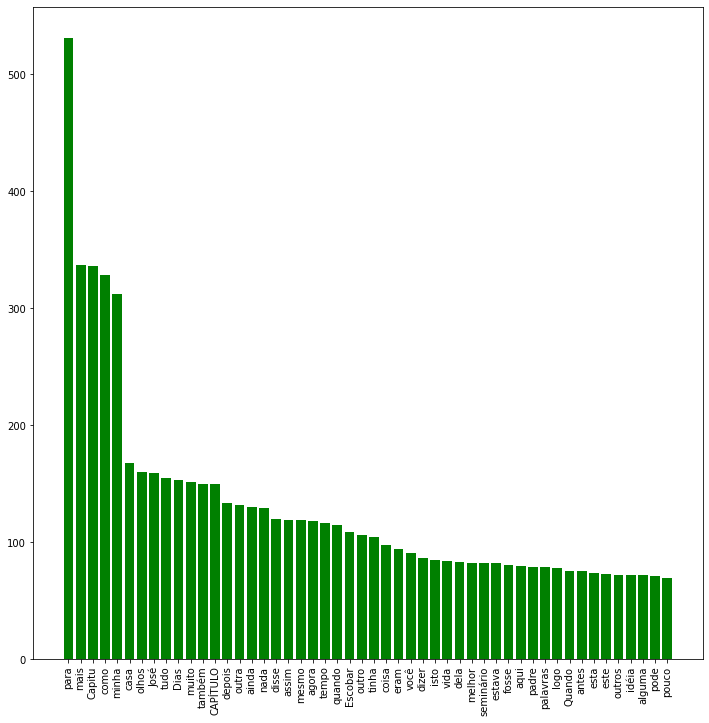

In [55]:
f, axs = plt.subplots(figsize=(12,12))

plt.bar(d2.keys(), d2.values(), color='g')
plt.xticks(rotation=90)
plt.show()

In [56]:
txt = "My name is Ståle"

print(txt)
print(txt.encode(encoding="ascii",errors="backslashreplace"))
print(txt.encode(encoding="ascii",errors="ignore"))
print(txt.encode(encoding="ascii",errors="namereplace"))
print(txt.encode(encoding="ascii",errors="replace"))
print(txt.encode(encoding="ascii",errors="xmlcharrefreplace"))

My name is Ståle
b'My name is St\\xe5le'
b'My name is Stle'
b'My name is St\\N{LATIN SMALL LETTER A WITH RING ABOVE}le'
b'My name is St?le'
b'My name is St&#229;le'


In [57]:
# Remove all special characters and punctuation

sample_text = "Sample text 123 !!!! Haha.... !!!! ##$$$%%%%"
clean_text = re.sub(r"[^A-Za-z0-9\s]+", "", sample_text)
print(sample_text+'\n'+clean_text)

Sample text 123 !!!! Haha.... !!!! ##$$$%%%%
Sample text 123  Haha  


In [58]:
# unicode string
string = 'pythön!'

# print string
print('The string is:', string)

# default encoding to utf-8
string_utf = string.encode(encoding='UTF-8-sig')

# print result
print('The encoded version is:', string_utf)

The string is: pythön!
The encoded version is: b'\xef\xbb\xbfpyth\xc3\xb6n!'


In [59]:
type(dom)

str

In [60]:
dom

"Romance, Dom Casmurro, 1899\n\nDom Casmurro\n\nTexto de referência:\n\nObras Completas de Machado de Assis,\nvol. I,\n\nNova Aguilar, Rio de\nJaneiro, 1994.\n\n\xa0Publicado originalmente\npela Editora Garnier, Rio de Janeiro, 1899.\n\nCAPÍTULO PRIMEIRO\n\nDO TÍTULO\n\nUma noite destas, vindo da cidade\npara o Engenho Novo, encontrei no trem da Central um rapaz aqui do bairro, que\neu conheço de vista e de chapéu. Cumprimentou-me, sentou-se ao pé de mim, falou\nda Lua e dos ministros, e acabou recitando-me versos. A viagem era curta, e os\nversos pode ser que não fossem inteiramente maus. Sucedeu, porém, que, como eu\nestava cansado, fechei os olhos três ou quatro vezes; tanto bastou para que ele\ninterrompesse a leitura e metesse os versos no bolso.\n\n\x97 Continue, disse eu acordando.\n\n\x97 Já acabei, murmurou ele.\n\n\x97 São muito bonitos.\n\nVi-lhe fazer um gesto para\ntirá-los outra vez do bolso, mas não passou do gesto; estava amuado. No dia seguinte\nentrou a dizer de mim n

In [61]:
texto1 = machado.words('romance/marm08.txt') # Uma lista de palavras, esta incluindo as pontuações

print(texto1)
len(texto1)

['Romance', ',', 'Dom', 'Casmurro', ',', '1899', 'Dom', ...]


82088

In [62]:
texto1[0:10]

['Romance',
 ',',
 'Dom',
 'Casmurro',
 ',',
 '1899',
 'Dom',
 'Casmurro',
 'Texto',
 'de']

In [63]:
type(texto1)

nltk.corpus.reader.util.StreamBackedCorpusView

In [64]:
domcasmurro =Text(texto1)

type(domcasmurro), type(domcasmurro.concordance('Bentinho'))

Displaying 25 of 56 matches:
persiste na idéia de meter o nosso Bentinho no seminário ? É mais que tempo , 
. Não me parece bonito que o nosso Bentinho ande metido nos cantos com a filha
. Em segredinhos , sempre juntos . Bentinho quase não sai de lá . A pequena é 
 faça desconfiar . Basta a idade ; Bentinho mal tem quinze anos . Capitu fez q
dre , tem - se ganho o principal . Bentinho há de satisfazer os desejos de sua
.  Estávamos , sim , senhor ; mas Bentinho ri logo , não agüenta .  Quando e
stantes .  Pois que outra coisa , Bentinho ?  Neste caso , peço - lhe um fav
izer : ' José Dias , preciso meter Bentinho no seminário '. Timidez não é tão 
meus estudos .  Estamos a bordo , Bentinho , estamos a bordo ! CAPÍTULO XXVII
a isso por mim , sim ? Você quer , Bentinho ?  Mamãe querendo ...  Quero , m
ei zangado .  Bem , cedo ao nosso Bentinho , suspirou o pai de Capitu . Pela 
tei o meu sonho imperial :  Não , Bentinho , deixemos o Imperador sossegado ,
nferno isto ! Você teim

(nltk.text.Text, NoneType)

In [65]:
domcasmurro[:10]

['Romance',
 ',',
 'Dom',
 'Casmurro',
 ',',
 '1899',
 'Dom',
 'Casmurro',
 'Texto',
 'de']

In [66]:
#bigramas - sequência de duas palavras

list(bigrams(domcasmurro[10:25]))

[('referência', ':'),
 (':', 'Obras'),
 ('Obras', 'Completas'),
 ('Completas', 'de'),
 ('de', 'Machado'),
 ('Machado', 'de'),
 ('de', 'Assis'),
 ('Assis', ','),
 (',', 'vol'),
 ('vol', '.'),
 ('.', 'I'),
 ('I', ','),
 (',', 'Nova'),
 ('Nova', 'Aguilar')]

In [67]:
#encontrar colocações(bigramas) # precisa instalar o nltk.download('stopwords') antes

# collocations from NLTK library. It only gives us the meaningful BiGrams and TriGrams

domcasmurro.collocations(20)

José Dias; minha mãe; prima Justina; tio Cosme; Minha mãe; que não;
Padre Cabral; Tio Cosme; Prima Justina; outra vez; alguma coisa; pode
ser; uma vez; outra coisa; muita vez; para mim; não sei; alguns
instantes; dia seguinte; Engenho Novo


**Tokenization** <br>
Tokenization é o nome dado para o processo de dividir uma grande quantidade de texto em pequenas quantidades - essas pequenas quantidades são chamadas de tokens. Essa é uma divisão importante para fazer análises textuais. <br>

A função word_tokenize() divide um texto por palavras e pontuações:

In [68]:
tt2 = "Sr. and Sra. Smith can't do it"

In [69]:
word_tokenize(tt2, language='english')

['Sr.', 'and', 'Sra', '.', 'Smith', 'ca', "n't", 'do', 'it']

In [70]:
wtpt = word_tokenize(re.sub(r'[.!?,:;"\x97"]+',' ',dom), language='portuguese') # Se usar nesta forma, pode-se perder contrações como Mr. Sr. Sra.
wtpt[:20]

['Romance',
 'Dom',
 'Casmurro',
 '1899',
 'Dom',
 'Casmurro',
 'Texto',
 'de',
 'referência',
 'Obras',
 'Completas',
 'de',
 'Machado',
 'de',
 'Assis',
 'vol',
 'I',
 'Nova',
 'Aguilar',
 'Rio']

In [71]:
wtpt = list(filter(lambda x: x not in ".!?,:;'\x97'" ,wtpt))
wtpt[:10]

['Romance',
 'Dom',
 'Casmurro',
 '1899',
 'Dom',
 'Casmurro',
 'Texto',
 'de',
 'referência',
 'Obras']

In [72]:
portuguese_tokenizer = nltk.data.load('tokenizers/punkt/PY3/portuguese.pickle')

tkpt = portuguese_tokenizer.tokenize(dom) # Tokenizando sentença em português

tkpt[:1]

['Romance, Dom Casmurro, 1899\n\nDom Casmurro\n\nTexto de referência:\n\nObras Completas de Machado de Assis,\nvol.']

In [73]:
sentencasdodom = nltk.sent_tokenize(dom)

sentencasdodom[:10]

['Romance, Dom Casmurro, 1899\n\nDom Casmurro\n\nTexto de referência:\n\nObras Completas de Machado de Assis,\nvol.',
 'I,\n\nNova Aguilar, Rio de\nJaneiro, 1994.',
 'Publicado originalmente\npela Editora Garnier, Rio de Janeiro, 1899.',
 'CAPÍTULO PRIMEIRO\n\nDO TÍTULO\n\nUma noite destas, vindo da cidade\npara o Engenho Novo, encontrei no trem da Central um rapaz aqui do bairro, que\neu conheço de vista e de chapéu.',
 'Cumprimentou-me, sentou-se ao pé de mim, falou\nda Lua e dos ministros, e acabou recitando-me versos.',
 'A viagem era curta, e os\nversos pode ser que não fossem inteiramente maus.',
 'Sucedeu, porém, que, como eu\nestava cansado, fechei os olhos três ou quatro vezes; tanto bastou para que ele\ninterrompesse a leitura e metesse os versos no bolso.',
 '\x97 Continue, disse eu acordando.',
 '\x97 Já acabei, murmurou ele.',
 '\x97 São muito bonitos.']

In [74]:
print(*sentencasdodom[:10])

Romance, Dom Casmurro, 1899

Dom Casmurro

Texto de referência:

Obras Completas de Machado de Assis,
vol. I,

Nova Aguilar, Rio de
Janeiro, 1994. Publicado originalmente
pela Editora Garnier, Rio de Janeiro, 1899. CAPÍTULO PRIMEIRO

DO TÍTULO

Uma noite destas, vindo da cidade
para o Engenho Novo, encontrei no trem da Central um rapaz aqui do bairro, que
eu conheço de vista e de chapéu. Cumprimentou-me, sentou-se ao pé de mim, falou
da Lua e dos ministros, e acabou recitando-me versos. A viagem era curta, e os
versos pode ser que não fossem inteiramente maus. Sucedeu, porém, que, como eu
estava cansado, fechei os olhos três ou quatro vezes; tanto bastou para que ele
interrompesse a leitura e metesse os versos no bolso.  Continue, disse eu acordando.  Já acabei, murmurou ele.  São muito bonitos.


In [75]:
nltk.FreqDist(w.lower() for w in wtpt if w.lower() not in stopwordsPT).most_common(20)

[('capitu', 341),
 ('mãe', 228),
 ('dias', 192),
 ('tudo', 189),
 ('capítulo', 188),
 ('casa', 169),
 ('olhos', 163),
 ('mim', 162),
 ('josé', 159),
 ('assim', 158),
 ('vez', 147),
 ('agora', 145),
 ('ainda', 141),
 ('outra', 138),
 ('nada', 135),
 ('disse', 123),
 ('tão', 122),
 ('tempo', 120),
 ('padre', 112),
 ('escobar', 110)]

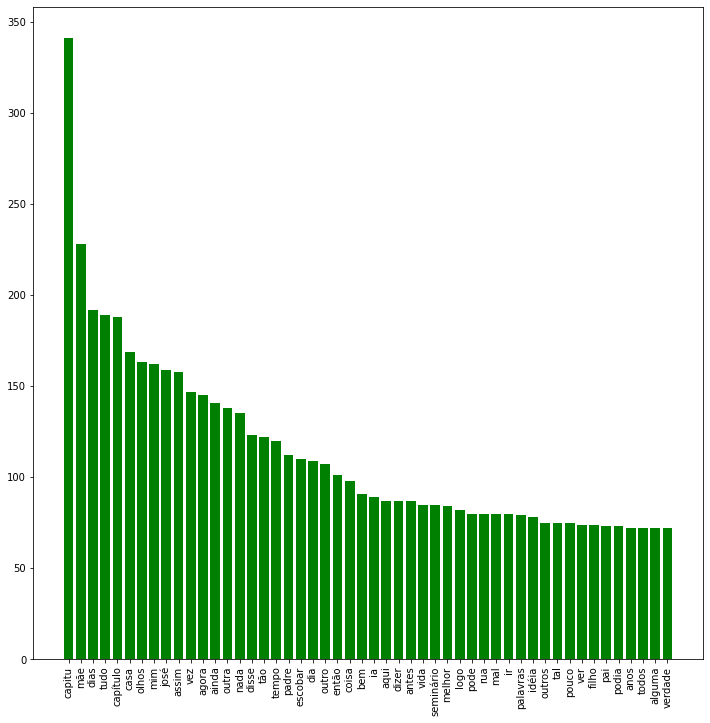

In [76]:
fd = nltk.FreqDist(w.lower() for w in wtpt if w.lower() not in stopwordsPT)

d3 = {k: v for k, v in sorted(fd.items(), key=lambda item: item[1], reverse = True)[:50]}
f, axs = plt.subplots(figsize=(12,12))

plt.bar(d3.keys(), d3.values(), color='g')
plt.xticks(rotation=90)
plt.show()

In [77]:
sent_tokenizer=nltk.data.load('tokenizers/punkt/portuguese.pickle')
raw_text = machado.raw('romance/marm05.txt')
sentences = sent_tokenizer.tokenize(raw_text)
for sent in sentences[980:985]:
    print("<<", sent, ">>")

<< Em verdade, parecia ainda mais mulher do que era;
seria criança nos seus folgares de moça; mas assim quieta, impassível, tinha a
compostura da mulher casada. >>
<< Talvez essa circunstância lhe diminuía um pouco da
graça virginal. >>
<< Depressa nos familiarizamos; a mãe fazia-lhe grandes elogios, eu
escutava-os de boa sombra, e ela sorria com os olhos fúlgidos, como se lá dentro
do cérebro lhe estivesse a voar uma borboletinha de asas de ouro e olhos de
diamante...

Digo lá dentro, porque cá fora o
que esvoaçou foi uma borboleta preta, que subitamente penetrou na varanda, e
começou a bater as asas em derredor de D. Eusébia. >>
<< D. Eusébia deu um grito,
levantou-se, praguejou umas palavras soltas:  T'esconjuro!... >>
<< Sai, diabo!... >>


In [78]:
sentences.index('''Em verdade, parecia ainda mais mulher do que era;
seria criança nos seus folgares de moça; mas assim quieta, impassível, tinha a
compostura da mulher casada.''')

980

In [79]:
re.findall("Em verdade...*", raw_text)

['Em verdade, dizia-me Marcela,',
 'Em verdade, parecia ainda mais mulher do que era;',
 'Em verdade vos digo que toda a',
 'Em verdade, eu',
 'Em verdade, as aventuras são a parte torrencial e']

In [80]:
domcasmurro.concordance('Capítulo')

Displaying 25 of 188 matches:
 Garnier , Rio de Janeiro , 1899 . CAPÍTULO PRIMEIRO DO TÍTULO Uma noite desta
 seus autores ; alguns nem tanto . CAPÍTULO II DO LIVRO Agora que expliquei o 
 . É o que vais entender , lendo . CAPÍTULO III A DENÚNCIA Ia a entrar na sala
 amargo , um dever amaríssimo ... CAPÍTULO IV UM DEVER AMARÍSSIMO ! José Dias
 conclusão . Um dever amaríssimo ! CAPÍTULO V O AGREGADO Nem sempre ia naquele
- lhe a cópia de papéis de autos . CAPÍTULO VI TIO COSME Tio Cosme vivia com m
Uma ou outra vez dizia pilhérias . CAPÍTULO VII D . GLÓRIA Minha mãe era boa c
afias instantâneas da felicidade . CAPÍTULO VIII É TEMPO Mas é tempo de tornar
vez valha a pena dá - la ; é só um capítulo . CAPÍTULO IX A ÓPERA Já não tinha
 pena dá - la ; é só um capítulo . CAPÍTULO IX A ÓPERA Já não tinha voz , mas 
, mas tudo cabe na mesma ópera ... CAPÍTULO X ACEITO A TEORIA Que é demasiada 
m . A mim é que ele me denunciou . CAPÍTULO XI A PROMESSA Tão depressa vi desa
de nada , para apertá 

In [81]:
nltk.download('rslp')
stemmer = nltk.stem.RSLPStemmer()
stemmer.stem("copiar")

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


'copi'

In [82]:
stemmer.stem("paisagem")

'pais'

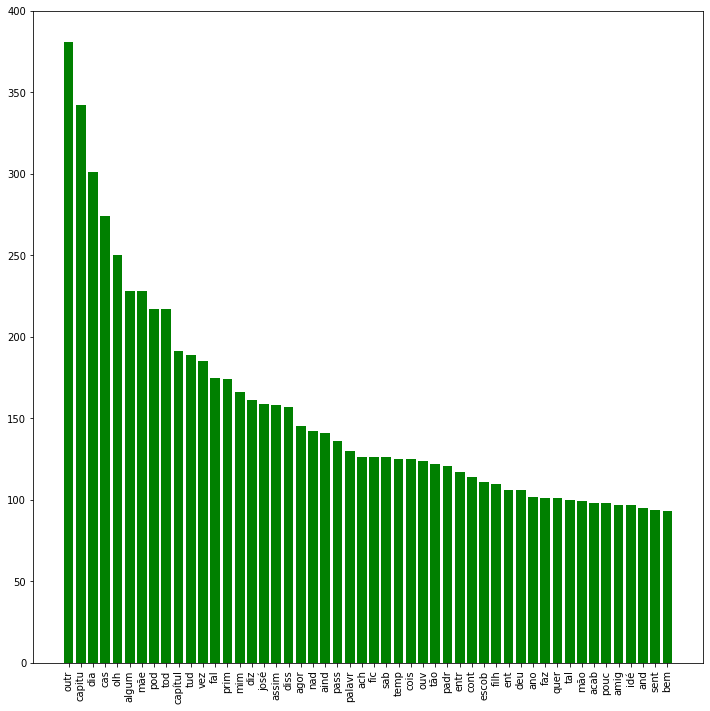

In [83]:
fd4 = nltk.FreqDist(stemmer.stem(w.lower()) for w in wtpt if w.lower() not in stopwordsPT)

d4 = {k: v for k, v in sorted(fd4.items(), key=lambda item: item[1], reverse = True)[:50]}
f, axs = plt.subplots(figsize=(12,12))

plt.bar(d4.keys(), d4.values(), color='g')
plt.xticks(rotation=90)
plt.show()

https://www.nltk.org/howto/portuguese_en.html

https://medium.com/turing-talks/uma-an%C3%A1lise-de-dom-casmurro-com-nltk-343d72dd47a7



In [93]:
h = re.compile('hello')
h.match('hello world')

<re.Match object; span=(0, 5), match='hello'>

In [94]:
re.match('hello', 'hello world')

<re.Match object; span=(0, 5), match='hello'>

In [95]:
#construindo um tagger
#Importa a biblioteca
nltk.download('mac_morpho')
from nltk.corpus import mac_morpho
#Carrega as sentença rotuladas do Corpus
sentencas_etiquetadas = mac_morpho.tagged_sents()

[nltk_data] Downloading package mac_morpho to /root/nltk_data...
[nltk_data]   Unzipping corpora/mac_morpho.zip.


In [96]:
print(sentencas_etiquetadas)

[[('Jersei', 'N'), ('atinge', 'V'), ('média', 'N'), ('de', 'PREP'), ('Cr$', 'CUR'), ('1,4', 'NUM'), ('milhão', 'N'), ('em', 'PREP|+'), ('a', 'ART'), ('venda', 'N'), ('de', 'PREP|+'), ('a', 'ART'), ('Pinhal', 'NPROP'), ('em', 'PREP'), ('São', 'NPROP'), ('Paulo', 'NPROP')], [('Programe', 'V'), ('sua', 'PROADJ'), ('viagem', 'N'), ('a', 'PREP|+'), ('a', 'ART'), ('Exposição', 'NPROP'), ('Nacional', 'NPROP'), ('do', 'NPROP'), ('Zebu', 'NPROP'), (',', ','), ('que', 'PRO-KS-REL'), ('começa', 'V'), ('dia', 'N'), ('25', 'N|AP')], ...]


In [97]:
tags = [tag for (word, tag) in mac_morpho.tagged_words()]

In [98]:
set(tags[:50])

{',',
 'ADJ',
 'ART',
 'CUR',
 'KC',
 'N',
 'NPROP',
 'NUM',
 'N|AP',
 'PREP',
 'PREP|+',
 'PRO-KS-REL',
 'PROADJ',
 'V'}

In [99]:
nltk.FreqDist(tags).most_common(20)

[('N', 236462),
 ('ART', 151891),
 ('NPROP', 114318),
 ('PREP', 104364),
 ('V', 98056),
 ('PREP|+', 78274),
 (',', 68494),
 ('ADJ', 53372),
 ('ADV', 30653),
 ('KC', 28262),
 ('PCP', 23092),
 ('"', 21069),
 ('PROADJ', 20919),
 ('NUM', 18110),
 ('VAUX', 17832),
 ('PROPESS', 14718),
 ('KS', 14320),
 ('PRO-KS-REL', 11347),
 ('PROSUB', 8598),
 (')', 7741)]

In [105]:
texto = '''É preferível lançar-se à luta, mesmo arriscando-se ao insucesso, do que
formar fila com aquelas almas mesquinhas e desmotivadas, que não sofrem nem
gozam muito; estas quiçá não conheçam o amargo da derrota, porém é certo que
não conhecem o sabor da vitória'''
tokens = word_tokenize(texto)
unigram_tagger = nltk.tag.UnigramTagger(sentencas_etiquetadas)
unigram_tagger.tag(tokens)

[('É', 'V'),
 ('preferível', 'ADJ'),
 ('lançar-se', None),
 ('à', 'NPROP'),
 ('luta', 'N'),
 (',', ','),
 ('mesmo', 'PROADJ'),
 ('arriscando-se', None),
 ('ao', 'PREP'),
 ('insucesso', 'N'),
 (',', ','),
 ('do', 'NPROP'),
 ('que', 'PRO-KS-REL'),
 ('formar', 'V'),
 ('fila', 'N'),
 ('com', 'PREP'),
 ('aquelas', 'PROADJ'),
 ('almas', 'N'),
 ('mesquinhas', None),
 ('e', 'KC'),
 ('desmotivadas', None),
 (',', ','),
 ('que', 'PRO-KS-REL'),
 ('não', 'ADV'),
 ('sofrem', 'V'),
 ('nem', 'KC'),
 ('gozam', None),
 ('muito', 'ADV'),
 (';', ';'),
 ('estas', 'PROADJ'),
 ('quiçá', 'ADV'),
 ('não', 'ADV'),
 ('conheçam', 'V'),
 ('o', 'ART'),
 ('amargo', 'ADJ'),
 ('da', 'NPROP'),
 ('derrota', 'N'),
 (',', ','),
 ('porém', 'KC'),
 ('é', 'V'),
 ('certo', 'ADJ'),
 ('que', 'PRO-KS-REL'),
 ('não', 'ADV'),
 ('conhecem', 'V'),
 ('o', 'ART'),
 ('sabor', 'N'),
 ('da', 'NPROP'),
 ('vitória', 'N')]

In [106]:
#bigramas e trigramas para treinar

from nltk.tag.sequential import DefaultTagger, UnigramTagger, BigramTagger, TrigramTagger
t0=DefaultTagger('N')
t1=UnigramTagger(sentencas_etiquetadas, backoff=t0)
t2=BigramTagger(sentencas_etiquetadas, backoff=t1)
t3=TrigramTagger(sentencas_etiquetadas, backoff=t2)

In [107]:
#após treinamento
t3.tag(tokens)

[('É', 'V'),
 ('preferível', 'ADJ'),
 ('lançar-se', 'N'),
 ('à', 'PREP|+'),
 ('luta', 'N'),
 (',', ','),
 ('mesmo', 'PDEN'),
 ('arriscando-se', 'N'),
 ('ao', 'PREP'),
 ('insucesso', 'N'),
 (',', ','),
 ('do', 'KS'),
 ('que', 'KS'),
 ('formar', 'V'),
 ('fila', 'N'),
 ('com', 'PREP'),
 ('aquelas', 'PROSUB'),
 ('almas', 'N'),
 ('mesquinhas', 'N'),
 ('e', 'KC'),
 ('desmotivadas', 'N'),
 (',', ','),
 ('que', 'PRO-KS-REL'),
 ('não', 'ADV'),
 ('sofrem', 'V'),
 ('nem', 'ADV'),
 ('gozam', 'N'),
 ('muito', 'ADV'),
 (';', ';'),
 ('estas', 'PROADJ'),
 ('quiçá', 'ADV'),
 ('não', 'ADV'),
 ('conheçam', 'V'),
 ('o', 'ART'),
 ('amargo', 'ADJ'),
 ('da', 'NPROP'),
 ('derrota', 'V'),
 (',', ','),
 ('porém', 'KC'),
 ('é', 'V'),
 ('certo', 'PROADJ'),
 ('que', 'PRO-KS-REL'),
 ('não', 'ADV'),
 ('conhecem', 'V'),
 ('o', 'ART'),
 ('sabor', 'N'),
 ('da', 'N'),
 ('vitória', 'N')]

In [108]:
#regexp_tokenize - baseado em expressões regulares

# Módulos
from nltk.tokenize import regexp_tokenize
# Padrao regex para encontrar palavras
pattern1 = r"W\w+"

palavrascomW = regexp_tokenize(dom, pattern1)
print(palavrascomW)

['Windsor', 'Walter', 'Wagner']


In [109]:
pattern1 = r"E\w*" # Para capitu

palavrascomW = regexp_tokenize(dom, pattern1)
print(palavrascomW)

['Editora', 'EIRO', 'Engenho', 'Engenho', 'E', 'Engenho', 'Enfim', 'Em', 'Entretanto', 'Em', 'Eia', 'ENÚNCIA', 'Em', 'Em', 'E', 'Eu', 'Está', 'EVER', 'Era', 'Era', 'EGADO', 'Era', 'Então', 'Eles', 'Eu', 'Esta', 'E', 'Era', 'Europa', 'E', 'E', 'Era', 'Em', 'Era', 'Enfim', 'Ela', 'Era', 'Era', 'EMPO', 'E', 'ERA', 'Europa', 'E', 'Eterno', 'Este', 'Esta', 'Escritura', 'Este', 'EITO', 'EORIA', 'Eu', 'ESSA', 'Entretanto', 'Em', 'Ela', 'Eu', 'Em', 'E', 'Em', 'Era', 'Entretanto', 'E', 'Eu', 'Então', 'Em', 'Eu', 'E', 'Esse', 'E', 'E', 'Era', 'Era', 'Em', 'Entrava', 'Então', 'Eu', 'E', 'Então', 'Então', 'ENTO', 'Ergueu', 'Em', 'Epístola', 'Evangelho', 'Estávamos', 'EPENTINA', 'Era', 'Era', 'Estávamos', 'E', 'Esta', 'E', 'E', 'Está', 'Estou', 'Está', 'ERINO', 'Europa', 'Escutai', 'Esta', 'E', 'E', 'E', 'Escritura', 'Elifás', 'Ele', 'ERMES', 'Ele', 'Então', 'Essa', 'Enfim', 'Eu', 'Estava', 'E', 'Ele', 'Este', 'Em', 'Europa', 'Europa', 'Ele', 'Então', 'Experimentemos', 'Estremeci', 'E', 'EM', 'E', 